In [1]:
# import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import custom functions
from scripts.stock_news_scraper import StockNewsScraper
from scripts.sentimental_analysis import analyze_sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/besu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# create an instance of StockNewsScraper
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
scraper = StockNewsScraper(tickers)

In [41]:
# scrape news articles for each ticker
scraper.process_tickers()

Processing AAPL...
Processing GOOGL...
Processing AMZN...


RemoteDisconnected: Remote end closed connection without response

In [5]:
# save the scraped data to a csv file
scraper.save_to_csv()

In [2]:
# load the scraped data from the csv file
df = pd.read_csv('../data/stock_news.csv', parse_dates=['Date'])

In [43]:
# statistical summary analysis
df.describe()

,Ticker,Date,Time,Headline
count,500,500,500,500
unique,5,4,310,415
top,AAPL,Dec-12-2024,07:00AM,Mag 7 will 'power through' markets in 2025: St...
freq,100,487,10,5


In [3]:
# create a sentimental analysis data series
sentimental_analysis = df['Headline'].apply(analyze_sentiment)
sentimental_df = sentimental_analysis.apply(pd.Series)
sentimental_df.columns = ['sentiment_negative_score', 'sentiment_neutral_score', 'sentiment_positive_score', 'sentiment_compound_score']

In [4]:
# show sentimental analysis data series
sentimental_df.head()

,sentiment_negative_score,sentiment_neutral_score,sentiment_positive_score,sentiment_compound_score
0,0.000,1.000,0.000,0.0000
1,0.000,0.838,0.162,0.4019
2,0.000,0.719,0.281,0.5994
3,0.000,1.000,0.000,0.0000
4,0.137,0.536,0.327,0.4939


In [5]:
# merge the sentimental analysis data series with the original data frame
df = pd.concat([df, sentimental_df], axis=1)

In [47]:
# show the merged data frame
df.head()

,Ticker,Date,Time,Headline,sentiment_negative_score,sentiment_neutral_score,sentiment_positive_score,sentiment_compound_score
0,AAPL,Dec-12-2024,02:49PM,Citi Analyst Highlights Apple's iOS 18.2 Launc...,0.000,1.000,0.000,0.0000
1,AAPL,Dec-12-2024,02:47PM,Apple nears switch to in-house Bluetooth and W...,0.000,0.838,0.162,0.4019
2,AAPL,Dec-12-2024,02:25PM,Magnificent Seven Stocks: Nvidia Stock Slides;...,0.000,0.719,0.281,0.5994
3,AAPL,Dec-12-2024,01:57PM,Apple nears switch from Broadcom chips; eyes i...,0.000,1.000,0.000,0.0000
4,AAPL,Dec-12-2024,01:35PM,United Airlines Integrates Apple AirTag Into A...,0.137,0.536,0.327,0.4939


In [48]:
# statistical summary analysis
df.describe()

,sentiment_negative_score,sentiment_neutral_score,sentiment_positive_score,sentiment_compound_score
count,500.000000,500.000000,500.000000,500.000000
mean,0.035242,0.833678,0.131084,0.162123
std,0.084109,0.161406,0.155470,0.340085
min,0.000000,0.288000,0.000000,-0.765000
25%,0.000000,0.718000,0.000000,0.000000
50%,0.000000,0.833000,0.074500,0.000000
75%,0.000000,1.000000,0.231000,0.406800
max,0.389000,1.000000,0.712000,0.915300


In [49]:
# group by ticker and date and calculate the average sentimental for each sentiment score
df_grouped = df.groupby(['Ticker', 'Date']).mean(numeric_only=True)

In [50]:
# show the grouped data frame
df_grouped.head()

sentiment_negative_score  sentiment_neutral_score  \
Ticker Date                                                             
AAPL   Dec-09-24                    0.000000                 0.707000   
       Dec-10-24                    0.000000                 1.000000   
       Dec-11-24                    0.000000                 1.000000   
       Dec-12-2024                  0.029577                 0.830371   
AMZN   Dec-09-24                    0.209000                 0.791000   

                    sentiment_positive_score  sentiment_compound_score  
Ticker Date                                                             
AAPL   Dec-09-24                    0.293000                  0.700300  
       Dec-10-24                    0.000000                  0.000000  
       Dec-11-24                    0.000000                  0.000000  
       Dec-12-2024                  0.140052                  0.195288  
AMZN   Dec-09-24                    0.000000                 -0.440400

In [51]:
# reset the index of the grouped data frame
df_grouped = df_grouped.reset_index()

In [52]:
# show the grouped data frame
df_grouped.head()

,Ticker,Date,sentiment_negative_score,sentiment_neutral_score,sentiment_positive_score,sentiment_compound_score
0,AAPL,Dec-09-24,0.000000,0.707000,0.293000,0.700300
1,AAPL,Dec-10-24,0.000000,1.000000,0.000000,0.000000
2,AAPL,Dec-11-24,0.000000,1.000000,0.000000,0.000000
3,AAPL,Dec-12-2024,0.029577,0.830371,0.140052,0.195288
4,AMZN,Dec-09-24,0.209000,0.791000,0.000000,-0.440400


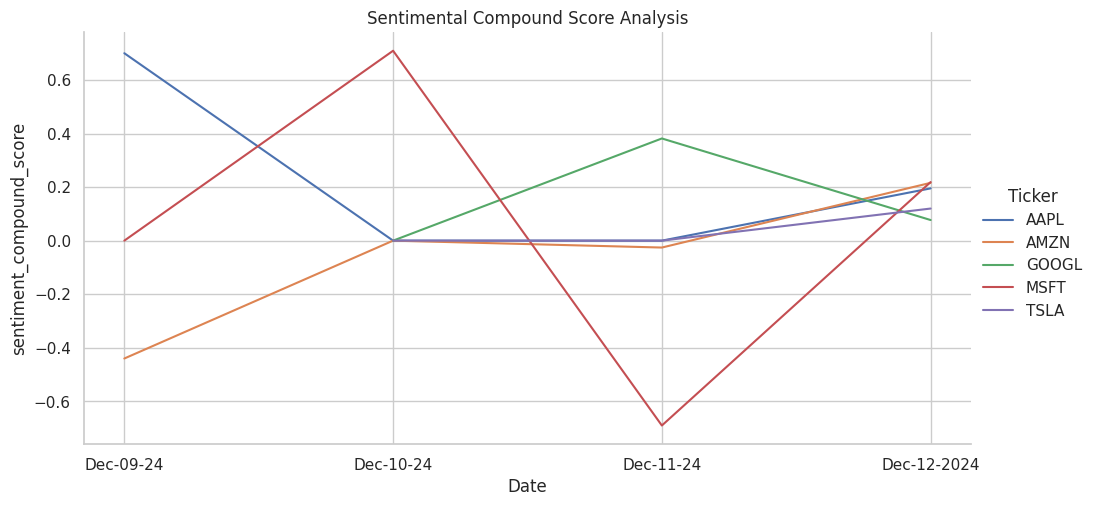

In [54]:
# plot the sentimental compound score analysis for each ticker
sns.set_theme(style="whitegrid")
sns.relplot(data=df_grouped, x='Date', y='sentiment_compound_score', hue='Ticker', kind='line', height=5, aspect=2)
plt.title('Sentimental Compound Score Analysis')
plt.show()

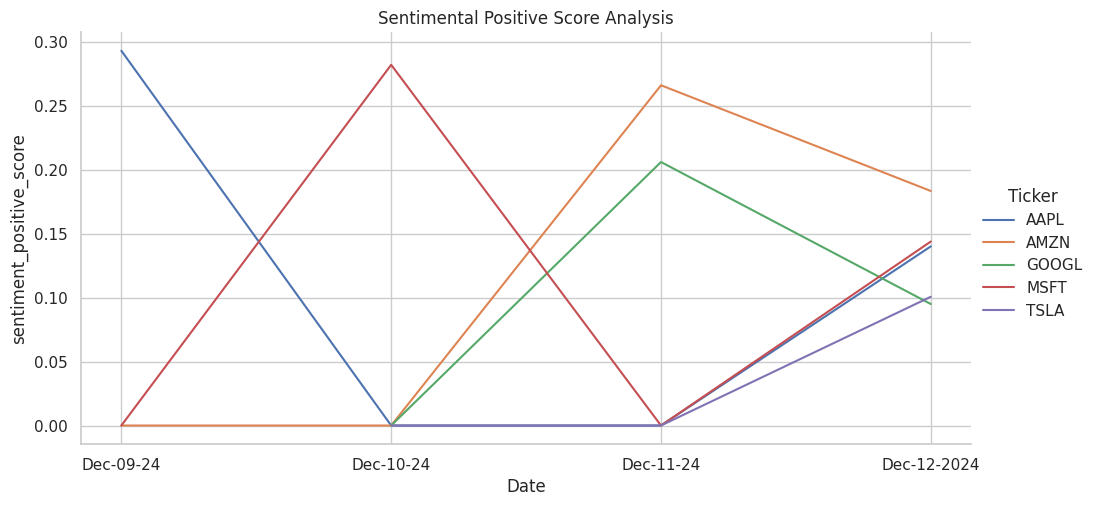

In [55]:
# plot the sentimental positive score analysis for each ticker
sns.set_theme(style="whitegrid")
sns.relplot(data=df_grouped, x='Date', y='sentiment_positive_score', hue='Ticker', kind='line', height=5, aspect=2)
plt.title('Sentimental Positive Score Analysis')
plt.show()

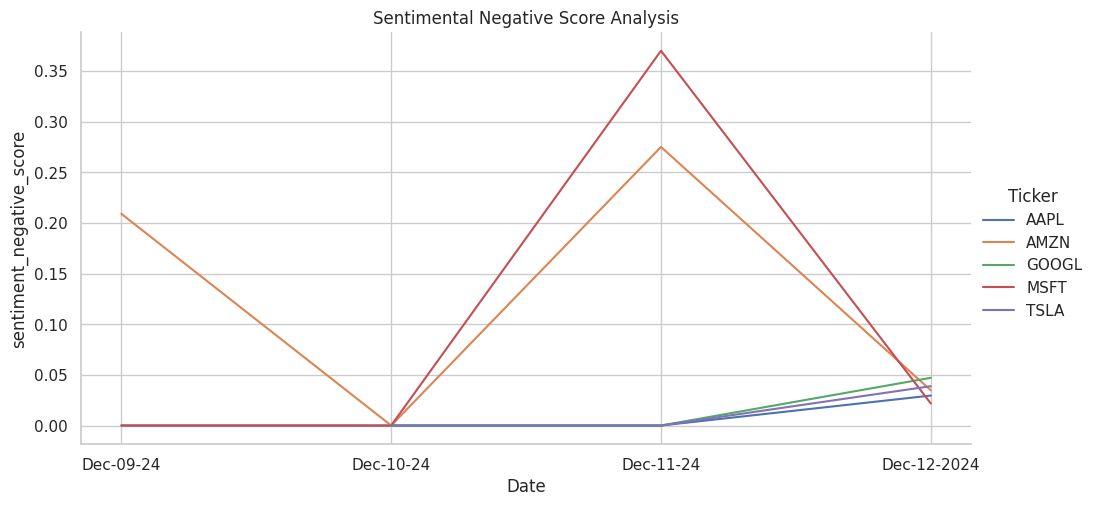

In [56]:
# plot the sentimental negative score analysis for each ticker
sns.set_theme(style="whitegrid")
sns.relplot(data=df_grouped, x='Date', y='sentiment_negative_score', hue='Ticker', kind='line', height=5, aspect=2)
plt.title('Sentimental Negative Score Analysis')
plt.show()

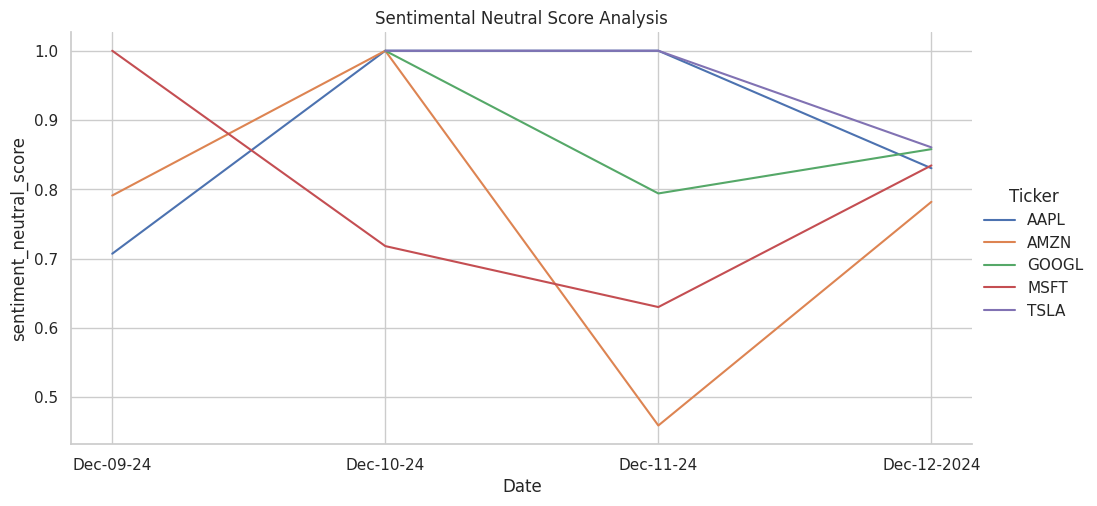

In [57]:
# plot the sentimental neutral score analysis for each ticker
sns.set_theme(style="whitegrid")
sns.relplot(data=df_grouped, x='Date', y='sentiment_neutral_score', hue='Ticker', kind='line', height=5, aspect=2)
plt.title('Sentimental Neutral Score Analysis')
plt.show()

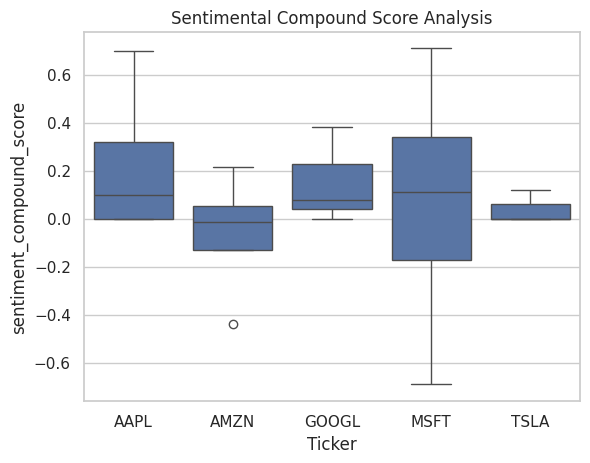

In [58]:
# plot the sentimental compound score analysis for each ticker using box plot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_grouped, x='Ticker', y='sentiment_compound_score')
plt.title('Sentimental Compound Score Analysis')
plt.show()

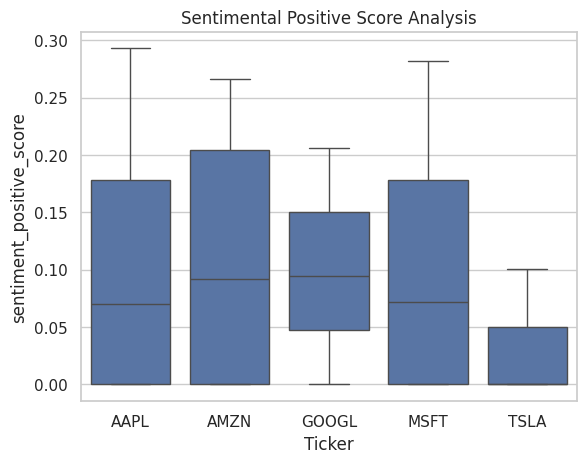

In [59]:
# plot the sentimental positive score analysis for each ticker using box plot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_grouped, x='Ticker', y='sentiment_positive_score')
plt.title('Sentimental Positive Score Analysis')
plt.show()

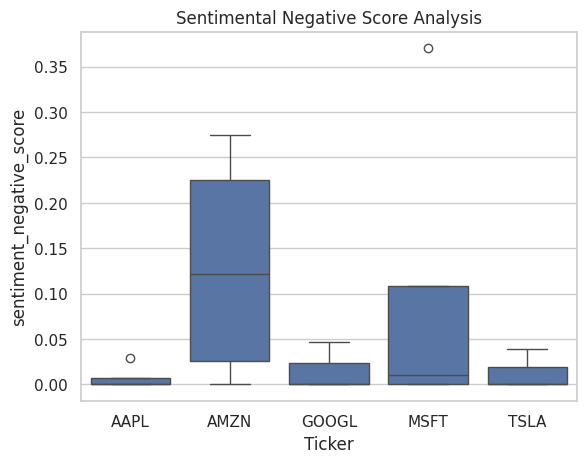

In [60]:
# plot the sentimental negative score analysis for each ticker using box plot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_grouped, x='Ticker', y='sentiment_negative_score')
plt.title('Sentimental Negative Score Analysis')
plt.show()

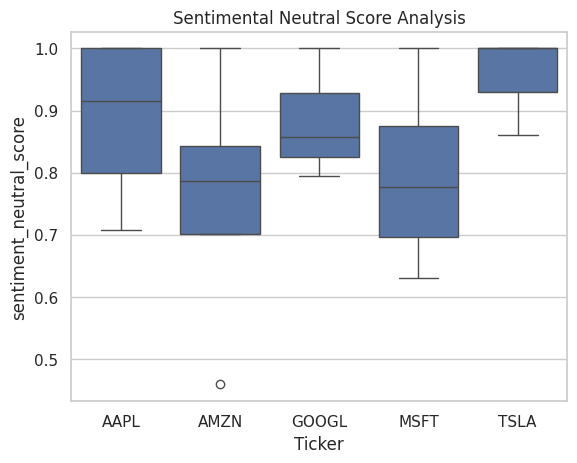

In [61]:
# plot the sentimental neutral score analysis for each ticker using box plot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_grouped, x='Ticker', y='sentiment_neutral_score')
plt.title('Sentimental Neutral Score Analysis')
plt.show()

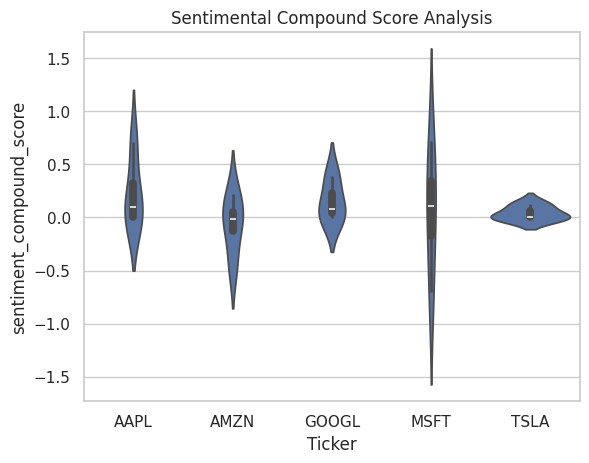

In [62]:
# plot the sentimental compound score analysis for each ticker using violin plot
sns.violinplot(data=df_grouped, x='Ticker', y='sentiment_compound_score')
plt.title('Sentimental Compound Score Analysis')
plt.show()

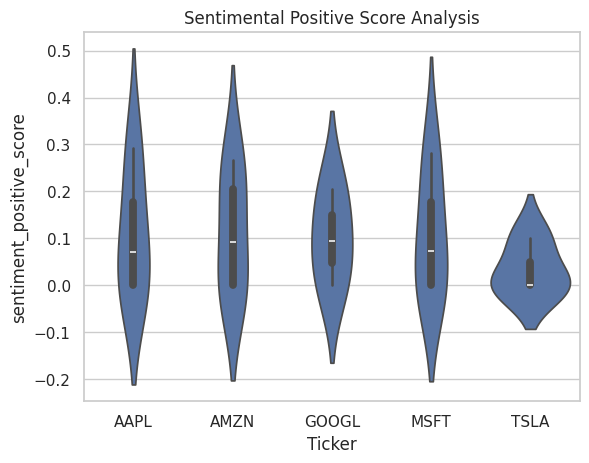

In [63]:
# plot the sentimental positive score analysis for each ticker using violin plot
sns.violinplot(data=df_grouped, x='Ticker', y='sentiment_positive_score')
plt.title('Sentimental Positive Score Analysis')
plt.show()

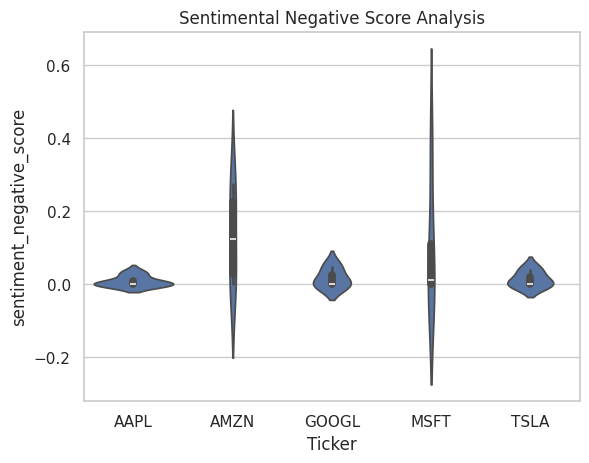

In [64]:
# plot the sentimental negative score analysis for each ticker using violin plot
sns.violinplot(data=df_grouped, x='Ticker', y='sentiment_negative_score')
plt.title('Sentimental Negative Score Analysis')
plt.show()

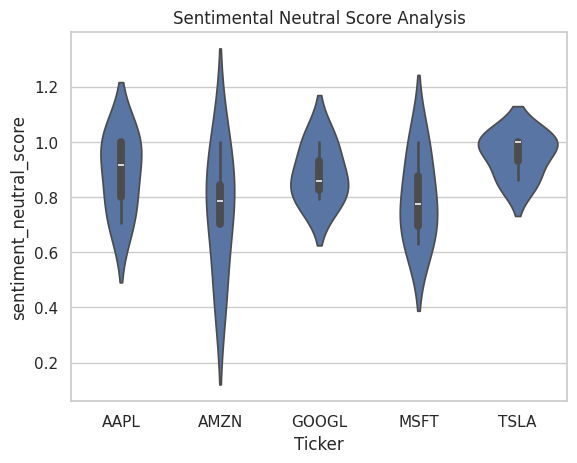

In [65]:
# plot the sentimental neutral score analysis for each ticker using violin plot
sns.violinplot(data=df_grouped, x='Ticker', y='sentiment_neutral_score')
plt.title('Sentimental Neutral Score Analysis')
plt.show()

In [68]:
# create a new df that is transposed based on compound
df_transposed = df_grouped.pivot(index='Date', columns='Ticker', values='sentiment_compound_score')

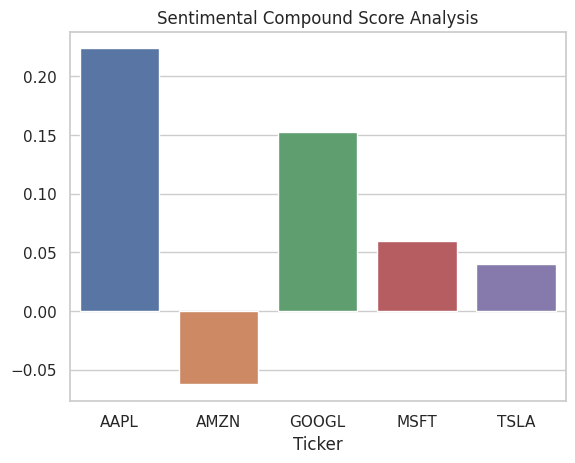

In [70]:
# plot the sentimental compound score analysis for each ticker using bar plot
sns.barplot(data=df_transposed, errorbar=None)
plt.title('Sentimental Compound Score Analysis')
plt.show()

In [6]:
# save the df in to csv file
df.to_csv('../data/stock_news_sentimental_analysis.csv', index=False)

-----------------------------------------------------------------------------------------------------------------------------